# ML Experiments Notebook
This notebook is designated for predicting the Pain point given a tweet text. 

In [1]:
from utils import *
import pandas as pd
import numpy as np
import torch

C:\Users\ahmed\anaconda3\lib\site-packages\torchaudio\extension\extension.py:14: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\Users\ahmed\anaconda3\lib\site-packages\torchaudio\backend\utils.py:88: UserWarning: No audio backend is available.
  warnings.warn('No audio backend is available.')


In [2]:
dataset = pd.read_excel('REVISION DATASET_b.xlsx')

## Filter the dataset which only represent a Pain Point

In [3]:
dataset = dataset[dataset['expresses a pain point'] == 'y']

In [4]:
dataset.head()

,fullname,is_retweet,likes,replies,retweets,text,expresses a pain point,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,BRAND,Type of Pain,Subjectivity,Second category,Third category,Fourth category,Dataset
0,Emmanuel Olabode,0,1,1,1,@ifemeetstech your pr team can help bridge the...,y,42175.965706,1434841837,6.123972e+17,/olabodeEO/status/612397168788406272,1955234486,olabodeEO,gap,Operational issues,NaN,NaN,NaN,NaN,Original
1,Alviniecððâ¨,0,0,0,0,mcdonalds really bein missing uhp people food ...,y,2014-09-01 23:25:17,1409613917,5.065836e+17,/ohhamazing/status/506583600599662592,2723652417,ohhamazing,mcdonalds,Product feature or quality,NaN,NaN,NaN,NaN,Original
2,Bobby,0,0,0,0,"if they thought that little of him, why was he...",y,43719.958704,1568242832,1.171921e+18,/Bobbythegreat/status/1171921495309914112,33740752,Bobbythegreat,gap,Product feature or quality,NaN,NaN,NaN,NaN,Original
3,Elgen Bodenstien,0,0,0,0,when towns have locally owned business capita...,y,2019-09-05 23:34:22,1567726462,1.169756e+18,/bodenstien/status/1169755684122087424,1167585352464424960,bodenstien,walmart,Company's image,NaN,NaN,NaN,NaN,Original
4,Robyn,0,3,1,1,@arma_vancouver health information in records ...,y,2019-01-23 22:43:08,1548283388,1.088206e+18,/RobynCBird/status/1088205518886191104,2206030555,RobynCBird,fitbit,Company's image,NaN,NaN,NaN,NaN,Original


## Remove the un-necessary columns and keep the text and its label only

In [5]:
dataset = dataset[['text','Type of Pain']]

## Visualize the distrubtion of different pain point categories.

In [6]:
pain_point_categories = dataset['Type of Pain'].value_counts().index.tolist()
pain_point_count = dataset['Type of Pain'].value_counts().to_list()

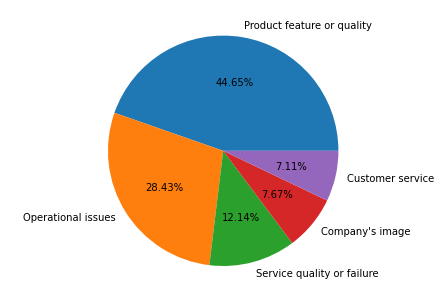

In [7]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = pain_point_categories
students = pain_point_count
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

# Dataset text analysis
The dataset consists of 1252 tweets which are divided into 5 main Pain-Point categories. The dataset is highly biased with about 44.65% of the data being only 1 category and 73% of the dataset is 2 categories. We are going to take a sub-sample from each large category such as the "Prodcut feature or quality" and "Operational issues" to be able to balance the dataset. However we would like to maintain the richness of our dataset by maintaining the same number of unique words. So in the next steps, We are checking the top frequent words and the total size of unique vocabulary.

In [8]:
vocab = {}
for sent in dataset['text']:
    tokens = sent.split(' ')
    for token in tokens:
        if token in vocab.keys():
            vocab[token] += 1
        else:
            vocab[token] = 1

In [9]:
len(vocab)

7205

## Sample from each different category with a specific value, if the sample size is bigger than the label count, it will take the whole column occurences

 
Analysis of the vocabulary size after sampling

In [10]:
sampled_dataset_200 = dataset_sampling(dataset,sample_size=200,random_state=1)
vocab = {}
for sent in sampled_dataset_200['text']:
    tokens = sent.split(' ')
    for token in tokens:
        if token in vocab.keys():
            vocab[token] += 1
        else:
            vocab[token] = 1
len(vocab)

4868

In [11]:
sampled_dataset_100 = dataset_sampling(dataset,sample_size=100,random_state=1)
vocab = {}
for sent in sampled_dataset_100['text']:
    tokens = sent.split(' ')
    for token in tokens:
        if token in vocab.keys():
            vocab[token] += 1
        else:
            vocab[token] = 1
len(vocab)

3666

In [12]:
sampled_dataset_50 = dataset_sampling(dataset,sample_size=50,random_state=1)
vocab = {}
for sent in sampled_dataset_50['text']:
    tokens = sent.split(' ')
    for token in tokens:
        if token in vocab.keys():
            vocab[token] += 1
        else:
            vocab[token] = 1
len(vocab)

2241

### Different Sample size findings:
Different Sample size alternate greatly in the vocabulary size as previously mentioned , 73% of the dataset is only 2 categories. So sampling from these categories with 50,100 sample size mean we are taking approximatley 12.5% and 25% from both these categories which why the vocabulary drop dramatically. We will conduct different initial experimentations with different sample sizes to compare its effect on training.

# Experimentation
We are going to examine the effect of the vocabulary size, the Hyperparameters of the Classification layers, different Transformer models and augmentation techniques on the general performance of our solution. Our hypothesis for vocabulary size is that the vocabulary size should affect the performance by degrading it but however the dataset will be highly imbalanced and we believe the results will be highly skewed. We will change one parameter and change the others to check how this specific parameter change the overall performance.

# BERT No Data Augmentation Trial Sample size = 50

### Initialize the BERT model specifing whether to use GPU or not.

### """Highly recommend to use GPU because it will crash the session"""

In [13]:
bert_tokenizer,bert_model = init_bert_model(gpu_usage=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Clean the dataset from hashtags and any un-necessary non-alphanumeric characters
The reason we are removing these characters and hashtags is that we dont want our model predictions to be corrupted by any external sources as our main basic block is a Transformer based model which its learning procedure is based on attention so we dont want the model to attend to less informative pieces.

In [14]:
processed_dataset = preprocess_text(sampled_dataset_50,text_column_name='text')

### Size of the 50 Sample Dataset.

In [15]:
len(processed_dataset)

250

### Analyzing the length of the vocabulary of removing all non-alphanumeric characters and Hashtags from the sampled dataset
It is expected that the length of the vocabulary should drop and this should reflect the percentage of hashtags and non-alphanumeric characters in the original dataset.

In [16]:
vocab = {}
for sent in processed_dataset:
    tokens = sent.split(' ')
    for token in tokens:
        if token in vocab.keys():
            vocab[token] += 1
        else:
            vocab[token] = 1
len(vocab)

2010

## Finding
As observed the percentage of vocabulary dropped about 9% which is reasonable as most tweets contain hashtags and other people mention. 

### Use BERT model to forward pass the data through it and store the output vectors with shape (number_of_sentences,max_length,bert_embedding_size)

In [17]:
bert_processed_text = transformer_model_dataset_preparation(processed_dataset,bert_model,bert_tokenizer,max_length=60)

### Create one hot encoding of the labels for the training process

In [18]:
processed_labels,dummies_names = labels_preprocessing(sampled_dataset_50,label_column_name='Type of Pain')

### Creating the classification layer as a 2 layered FFN
We are creating a classification layer over the output of the Transformer model output (BERT/RoBERTa) so we can leverage the pre-trained Transformer model without retraining or training from scratch. We are using the pretrained models to perform a down-stream task which text classification of 5 different categories. The output of the Transformer model dimension is 768 long vector so we first project his vector in smaller linear space so that our first layer will output [batch_size,sequence_size,hidden_size] then the final classification layer with input [batch_size,sequence_size * hidden_size]

In [19]:
import torch.nn as nn
class Classification_Model(nn.Module):
    def __init__(self,sequence_length,hidden_size):
        super(Classification_Model,self).__init__()
        self.ff = nn.Linear(768,hidden_size)
        self.out = nn.Linear(sequence_length * hidden_size,5)
        self.selu = nn.SELU()
        self.soft = nn.Softmax(dim=-1)
    def forward(self,x,batch_size):
        x = self.selu(self.ff(x))
        x = x.reshape(batch_size,-1)
        x = self.out(x)
        return x
class_model = Classification_Model(sequence_length = 60,hidden_size=16)
class_model.to('cuda')

Classification_Model(
  (ff): Linear(in_features=768, out_features=16, bias=True)
  (out): Linear(in_features=960, out_features=5, bias=True)
  (selu): SELU()
  (soft): Softmax(dim=-1)
)

### Spliting the dataset into train and test partitions.
We will use 75%/25% train-test split for all our experimentations.

In [20]:
train_dataset,train_labels,test_dataset,test_labels = train_test_split(bert_processed_text,processed_labels,test_size=60)

### The training loop which output the precision,recall,f1 for each label. 

In [21]:
training_loop(class_model,train_dataset,train_labels,test_dataset,test_labels,batch_size=8,epochs=10,learning_rate=1e-3,dummies_names=dummies_names.to_list())

Loss value:1.5856971740722656
Test Results Epoch 0 :
                            precision    recall  f1-score   support

           Company's image       0.22      0.29      0.25         7
          Customer service       0.40      0.13      0.20        15
        Operational issues       0.20      0.18      0.19        11
Product feature or quality       0.18      0.36      0.24        11
Service quality or failure       0.50      0.44      0.47        16

                  accuracy                           0.28        60
                 macro avg       0.30      0.28      0.27        60
              weighted avg       0.33      0.28      0.28        60

------------------------------------------------------------------------------------------
Loss value:0.9562175818111586
Test Results Epoch 1 :
                            precision    recall  f1-score   support

           Company's image       0.38      0.43      0.40         7
          Customer service       0.27      0.20    

# BERT No Data Augmentation Trial Sample size = 100

We will repeat the same exact steps for Sample size = 100 and Sample size = 200 to check the effect of the size of vocabulary on the overall performance of our solution.

In [22]:
processed_dataset = preprocess_text(sampled_dataset_100,text_column_name='text')

In [23]:
len(processed_dataset)

485

In [24]:
vocab = {}
for sent in processed_dataset:
    tokens = sent.split(' ')
    for token in tokens:
        if token in vocab.keys():
            vocab[token] += 1
        else:
            vocab[token] = 1
len(vocab)

3207

In [25]:
bert_processed_text = transformer_model_dataset_preparation(processed_dataset,bert_model,bert_tokenizer,max_length=60)

In [26]:
processed_labels,dummies_names = labels_preprocessing(sampled_dataset_100,label_column_name='Type of Pain')

In [27]:
class_model = Classification_Model(sequence_length = 60,hidden_size=16)
class_model.to('cuda')

Classification_Model(
  (ff): Linear(in_features=768, out_features=16, bias=True)
  (out): Linear(in_features=960, out_features=5, bias=True)
  (selu): SELU()
  (soft): Softmax(dim=-1)
)

In [28]:
train_dataset,train_labels,test_dataset,test_labels = train_test_split(bert_processed_text,processed_labels,test_size=120)

### Spliting the dataset into train and test partitions.
We will use 75%/25% train-test split for all our experimentations.

In [29]:
training_loop(class_model,train_dataset,train_labels,test_dataset,test_labels,batch_size=8,epochs=10,learning_rate=1e-3,dummies_names=dummies_names.to_list())

Loss value:1.5315236462487114
Test Results Epoch 0 :
                            precision    recall  f1-score   support

           Company's image       0.40      0.95      0.56        20
          Customer service       0.50      0.33      0.40        27
        Operational issues       0.00      0.00      0.00        22
Product feature or quality       0.82      0.31      0.45        29
Service quality or failure       0.35      0.64      0.45        22

                  accuracy                           0.42       120
                 macro avg       0.41      0.45      0.37       120
              weighted avg       0.44      0.42      0.37       120

------------------------------------------------------------------------------------------
Loss value:0.9098071091704898
Test Results Epoch 1 :
                            precision    recall  f1-score   support

           Company's image       0.38      0.90      0.54        20
          Customer service       0.67      0.30    

# BERT No Data Augmentation Trial Sample size = 200

We will repeat the same exact steps for Sample size = 200 to check the effect of the size of vocabulary on the overall performance of our solution.

In [30]:
processed_dataset = preprocess_text(sampled_dataset_200,text_column_name='text')

In [31]:
len(processed_dataset)

737

In [32]:
vocab = {}
for sent in processed_dataset:
    tokens = sent.split(' ')
    for token in tokens:
        if token in vocab.keys():
            vocab[token] += 1
        else:
            vocab[token] = 1
len(vocab)

4202

In [33]:
bert_processed_text = transformer_model_dataset_preparation(processed_dataset,bert_model,bert_tokenizer,max_length=60)

In [34]:
processed_labels,dummies_names = labels_preprocessing(sampled_dataset_200,label_column_name='Type of Pain')

In [41]:
class_model = Classification_Model(sequence_length = 60,hidden_size=16)
class_model.to('cuda')

Classification_Model(
  (ff): Linear(in_features=768, out_features=16, bias=True)
  (out): Linear(in_features=960, out_features=5, bias=True)
  (selu): SELU()
  (soft): Softmax(dim=-1)
)

In [42]:
train_dataset,train_labels,test_dataset,test_labels = train_test_split(bert_processed_text,processed_labels,test_size=180)

### Spliting the dataset into train and test partitions.
We will use 75%/25% train-test split for all our experimentations.

In [43]:
training_loop(class_model,train_dataset,train_labels,test_dataset,test_labels,batch_size=8,epochs=10,learning_rate=1e-3,dummies_names=dummies_names.to_list())

Loss value:1.4312374030334363
Test Results Epoch 0 :
                            precision    recall  f1-score   support

           Company's image       1.00      0.12      0.21        26
          Customer service       0.18      0.10      0.13        20
        Operational issues       0.40      0.46      0.43        50
Product feature or quality       0.47      0.85      0.61        55
Service quality or failure       0.75      0.21      0.32        29

                  accuracy                           0.45       180
                 macro avg       0.56      0.35      0.34       180
              weighted avg       0.54      0.45      0.40       180

------------------------------------------------------------------------------------------
Loss value:0.9287581763405731
Test Results Epoch 1 :
                            precision    recall  f1-score   support

           Company's image       0.71      0.46      0.56        26
          Customer service       0.23      0.15    

In [46]:
sampled_dataset_50.to_csv('sampled_dataset_50.csv')

## Conclusion 
As the previous results, we observe that the equal size sample for each class is the best performing strategy which is the 100 Sample per dataset with F1-Score 54%. Moreover we can see that the top performing class in the 200 Sample dataset is the class with most examples "Product feature or quality" which means that the model is biased toward that class which is normal.

## Setup for Hyperparameters change.
We will increase the hidden dimension size to 32 of the classification layer to check the general performance.

In [47]:
processed_dataset = preprocess_text(sampled_dataset_100,text_column_name='text')

In [48]:
len(processed_dataset)

485

In [49]:
vocab = {}
for sent in processed_dataset:
    tokens = sent.split(' ')
    for token in tokens:
        if token in vocab.keys():
            vocab[token] += 1
        else:
            vocab[token] = 1
len(vocab)

3207

In [50]:
bert_processed_text = transformer_model_dataset_preparation(processed_dataset,bert_model,bert_tokenizer,max_length=60)

In [51]:
processed_labels,dummies_names = labels_preprocessing(sampled_dataset_100,label_column_name='Type of Pain')

In [52]:
class_model = Classification_Model(sequence_length = 60,hidden_size=32)
class_model.to('cuda')

Classification_Model(
  (ff): Linear(in_features=768, out_features=32, bias=True)
  (out): Linear(in_features=1920, out_features=5, bias=True)
  (selu): SELU()
  (soft): Softmax(dim=-1)
)

In [53]:
train_dataset,train_labels,test_dataset,test_labels = train_test_split(bert_processed_text,processed_labels,test_size=120)

In [54]:
training_loop(class_model,train_dataset,train_labels,test_dataset,test_labels,batch_size=8,epochs=10,learning_rate=1e-3,dummies_names=dummies_names.to_list())

Loss value:1.458296275138855
Test Results Epoch 0 :
                            precision    recall  f1-score   support

           Company's image       0.52      0.68      0.59        19
          Customer service       1.00      0.04      0.07        26
        Operational issues       0.26      0.30      0.28        23
Product feature or quality       0.61      0.54      0.57        26
Service quality or failure       0.39      0.65      0.49        26

                  accuracy                           0.43       120
                 macro avg       0.55      0.44      0.40       120
              weighted avg       0.56      0.43      0.39       120

------------------------------------------------------------------------------------------
Loss value:0.6517252239916059
Test Results Epoch 1 :
                            precision    recall  f1-score   support

           Company's image       0.52      0.68      0.59        19
          Customer service       0.70      0.27     

## Setup for Hyperparameters change.
We will increase the hidden dimension size to 64 of the classification layer to check the general performance.

In [67]:
class_model = Classification_Model(sequence_length = 60,hidden_size=64)
class_model.to('cuda')

Classification_Model(
  (ff): Linear(in_features=768, out_features=64, bias=True)
  (out): Linear(in_features=3840, out_features=5, bias=True)
  (selu): SELU()
  (soft): Softmax(dim=-1)
)

In [68]:
train_dataset,train_labels,test_dataset,test_labels = train_test_split(bert_processed_text,processed_labels,test_size=120)

In [69]:
training_loop(class_model,train_dataset,train_labels,test_dataset,test_labels,batch_size=8,epochs=10,learning_rate=1e-3,dummies_names=dummies_names.to_list())

Loss value:1.4730804231431749
Test Results Epoch 0 :
                            precision    recall  f1-score   support

           Company's image       0.65      0.58      0.61        26
          Customer service       0.29      0.10      0.15        20
        Operational issues       0.20      0.45      0.28        20
Product feature or quality       0.67      0.56      0.61        25
Service quality or failure       0.32      0.28      0.30        29

                  accuracy                           0.40       120
                 macro avg       0.43      0.39      0.39       120
              weighted avg       0.44      0.40      0.40       120

------------------------------------------------------------------------------------------
Loss value:0.6110072145859401
Test Results Epoch 1 :
                            precision    recall  f1-score   support

           Company's image       0.57      0.65      0.61        26
          Customer service       0.47      0.35    

## Setup for Hyperparameters change.
We will decrease the hidden dimension size to 8 of the classification layer to check the general performance.

In [70]:
class_model = Classification_Model(sequence_length =60,hidden_size=8)
class_model.to('cuda')

Classification_Model(
  (ff): Linear(in_features=768, out_features=8, bias=True)
  (out): Linear(in_features=480, out_features=5, bias=True)
  (selu): SELU()
  (soft): Softmax(dim=-1)
)

In [71]:
train_dataset,train_labels,test_dataset,test_labels = train_test_split(bert_processed_text,processed_labels,test_size=120)

In [72]:
training_loop(class_model,train_dataset,train_labels,test_dataset,test_labels,batch_size=8,epochs=10,learning_rate=1e-3,dummies_names=dummies_names.to_list())

Loss value:1.5964349587758382
Test Results Epoch 0 :
                            precision    recall  f1-score   support

           Company's image       0.31      0.60      0.41        20
          Customer service       0.25      0.05      0.09        19
        Operational issues       0.13      0.10      0.11        20
Product feature or quality       0.43      0.72      0.53        32
Service quality or failure       0.00      0.00      0.00        29

                  accuracy                           0.32       120
                 macro avg       0.22      0.29      0.23       120
              weighted avg       0.23      0.32      0.24       120

------------------------------------------------------------------------------------------
Loss value:1.1213177654478286
Test Results Epoch 1 :
                            precision    recall  f1-score   support

           Company's image       0.34      0.80      0.48        20
          Customer service       0.27      0.16    

## Conclusion
As observed, Increasing the hidden dimension of the classification layer tend to slightly decrease the performance as the dataset is very small for this number of parameters. And decrease the hidden dimension tend to decrease the performance as the model capacity greatly decreased.

# RoBERTa No Data Augmentation Trial
We will use the 100 Samples Dataset accompanied with the 16-Hidden dimension as these are the best performing models to check whether RoBERTa is better than BERT or not.

In [73]:
processed_dataset = preprocess_text(sampled_dataset_100,text_column_name='text')

In [74]:
len(processed_dataset)

485

In [75]:
vocab = {}
for sent in processed_dataset:
    tokens = sent.split(' ')
    for token in tokens:
        if token in vocab.keys():
            vocab[token] += 1
        else:
            vocab[token] = 1
len(vocab)

3207

In [76]:
roberta_tokenizer,roberta_model = init_roberta_model(gpu_usage=True)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [77]:
roberta_processed_text = transformer_model_dataset_preparation(processed_dataset,roberta_model,roberta_tokenizer,max_length=60)

In [78]:
train_dataset,train_labels,test_dataset,test_labels = train_test_split(roberta_processed_text,processed_labels,test_size=120)

## Re-initializing the classification layer so it is not affected by previous training

In [79]:
class_model = Classification_Model(sequence_length = 60,hidden_size=16)
class_model.to('cuda')

Classification_Model(
  (ff): Linear(in_features=768, out_features=16, bias=True)
  (out): Linear(in_features=960, out_features=5, bias=True)
  (selu): SELU()
  (soft): Softmax(dim=-1)
)

In [80]:
training_loop(class_model,train_dataset,train_labels,test_dataset,test_labels,batch_size=8,epochs=10,learning_rate=1e-3,dummies_names=dummies_names.to_list())

Loss value:1.5999701367484198
Test Results Epoch 0 :
                            precision    recall  f1-score   support

           Company's image       0.00      0.00      0.00        27
          Customer service       0.40      0.22      0.29        18
        Operational issues       0.17      0.29      0.21        21
Product feature or quality       0.53      0.36      0.43        25
Service quality or failure       0.38      0.76      0.51        29

                  accuracy                           0.34       120
                 macro avg       0.30      0.33      0.29       120
              weighted avg       0.29      0.34      0.29       120

------------------------------------------------------------------------------------------
Loss value:1.2275404744678073
Test Results Epoch 1 :
                            precision    recall  f1-score   support

           Company's image       1.00      0.15      0.26        27
          Customer service       0.56      0.50    

## Conclusion
It seems that RoBERTa is able to outperform BERT with about 6% which is reasonable as RoBERTa was exposed to more training data which has more variety.

# Data Augmentation Experiments 
We are going to experiment with different Data Augmentation techniques to check whether it will improve performance or not.

## Random Word Deletion

In [81]:
processed_dataset = preprocess_text(sampled_dataset_100,text_column_name='text')

In [82]:
len(processed_dataset)

485

In [83]:
aug_dataset = augment_text_random(processed_dataset,'delete')

### Concatenating the old and new augmented datasets (lists)

In [84]:
new_dataset = processed_dataset + aug_dataset

In [93]:
new_labels

torch.Size([970, 5])

### Size of new Dataset

In [99]:
dataset.to_csv('Data_augment_deletion.csv')

In [85]:
len(new_dataset)

970

### Same labels as order didnt change and concatenate them.

In [86]:
aug_labels = processed_labels

In [87]:
new_labels = torch.cat((processed_labels,aug_labels),dim=0)

In [88]:
roberta_processed_text = transformer_model_dataset_preparation(new_dataset,roberta_model,roberta_tokenizer,max_length=60)

In [89]:
class_model = Classification_Model(sequence_length = 60,hidden_size=16)
class_model.to('cuda')

Classification_Model(
  (ff): Linear(in_features=768, out_features=16, bias=True)
  (out): Linear(in_features=960, out_features=5, bias=True)
  (selu): SELU()
  (soft): Softmax(dim=-1)
)

In [90]:
train_dataset,train_labels,test_dataset,test_labels = train_test_split(roberta_processed_text,new_labels,test_size=300)

In [91]:
training_loop(class_model,train_dataset,train_labels,test_dataset,test_labels,batch_size=8,epochs=10,learning_rate=1e-3,dummies_names=dummies_names.to_list())

Loss value:1.4909043570598923
Test Results Epoch 0 :
                            precision    recall  f1-score   support

           Company's image       0.60      0.59      0.60        59
          Customer service       0.48      0.28      0.35        54
        Operational issues       0.31      0.61      0.41        64
Product feature or quality       0.69      0.42      0.53        59
Service quality or failure       0.57      0.44      0.50        64

                  accuracy                           0.47       300
                 macro avg       0.53      0.47      0.48       300
              weighted avg       0.53      0.47      0.48       300

------------------------------------------------------------------------------------------
Loss value:1.0322155866278224
Test Results Epoch 1 :
                            precision    recall  f1-score   support

           Company's image       0.68      0.68      0.68        59
          Customer service       0.58      0.46    

# Random Swapping Trial

In [100]:
aug_dataset = augment_text_random(processed_dataset,'swap')

In [101]:
new_dataset = processed_dataset + aug_dataset

## Same labels as order didnt change and concatenate them.

In [102]:
aug_labels = processed_labels

In [103]:
new_labels = torch.cat((processed_labels,aug_labels),dim=0)

In [105]:
roberta_processed_text = transformer_model_dataset_preparation(new_dataset,roberta_model,roberta_tokenizer,max_length=60)

In [110]:
class_model = Classification_Model(sequence_length = 60,hidden_size=16)
class_model.to('cuda')

Classification_Model(
  (ff): Linear(in_features=768, out_features=16, bias=True)
  (out): Linear(in_features=960, out_features=5, bias=True)
  (selu): SELU()
  (soft): Softmax(dim=-1)
)

In [111]:
train_dataset,train_labels,test_dataset,test_labels = train_test_split(roberta_processed_text,new_labels,test_size=300)

In [112]:
training_loop(class_model,train_dataset,train_labels,test_dataset,test_labels,batch_size=8,epochs=10,learning_rate=1e-3,dummies_names=dummies_names.to_list())

Loss value:1.486865526222321
Test Results Epoch 0 :
                            precision    recall  f1-score   support

           Company's image       0.67      0.59      0.63        59
          Customer service       0.40      0.81      0.54        58
        Operational issues       0.75      0.04      0.08        69
Product feature or quality       0.46      0.85      0.60        55
Service quality or failure       0.64      0.27      0.38        59

                  accuracy                           0.49       300
                 macro avg       0.59      0.51      0.45       300
              weighted avg       0.59      0.49      0.43       300

------------------------------------------------------------------------------------------
Loss value:0.9680180377270802
Test Results Epoch 1 :
                            precision    recall  f1-score   support

           Company's image       0.68      0.71      0.69        59
          Customer service       0.54      0.79     

# Substitute Synoymn Trial

In [113]:
aug_dataset = augment_text_substitute(processed_dataset,'wordnet')

In [114]:
new_dataset = processed_dataset + aug_dataset

In [115]:
len(new_dataset)

970

### New Vocabulary Size after Synonyms Addition

In [116]:
vocab = {}
for sent in new_dataset:
    tokens = sent.split(' ')
    for token in tokens:
        if token in vocab.keys():
            vocab[token] += 1
        else:
            vocab[token] = 1
len(vocab)

4240

In [117]:
aug_labels = processed_labels

In [118]:
new_labels = torch.cat((processed_labels,aug_labels),dim=0)

In [120]:
roberta_processed_text = transformer_model_dataset_preparation(new_dataset,roberta_model,roberta_tokenizer,max_length=60)

In [124]:
class_model = Classification_Model(sequence_length = 60,hidden_size=16)
class_model.to('cuda')

Classification_Model(
  (ff): Linear(in_features=768, out_features=16, bias=True)
  (out): Linear(in_features=960, out_features=5, bias=True)
  (selu): SELU()
  (soft): Softmax(dim=-1)
)

In [125]:
train_dataset,train_labels,test_dataset,test_labels = train_test_split(roberta_processed_text,new_labels,test_size=300)

In [126]:
training_loop(class_model,train_dataset,train_labels,test_dataset,test_labels,batch_size=8,epochs=10,learning_rate=1e-3,dummies_names=dummies_names.to_list())

Loss value:1.5106921253434147
Test Results Epoch 0 :
                            precision    recall  f1-score   support

           Company's image       0.71      0.64      0.67        64
          Customer service       0.40      0.80      0.54        55
        Operational issues       0.43      0.10      0.16        61
Product feature or quality       0.67      0.45      0.54        58
Service quality or failure       0.33      0.42      0.37        62

                  accuracy                           0.48       300
                 macro avg       0.51      0.48      0.45       300
              weighted avg       0.51      0.48      0.45       300

------------------------------------------------------------------------------------------
Loss value:0.9819542937968151
Test Results Epoch 1 :
                            precision    recall  f1-score   support

           Company's image       0.77      0.69      0.73        64
          Customer service       0.54      0.76    

# RoBERTa Contextual Embed. Trial

In [127]:
aug_dataset = augment_text_substitute(processed_dataset,'contextual_emb')

In [128]:
new_dataset = processed_dataset + aug_dataset

In [129]:
vocab = {}
for sent in new_dataset:
    tokens = sent.split(' ')
    for token in tokens:
        if token in vocab.keys():
            vocab[token] += 1
        else:
            vocab[token] = 1
len(vocab)

4497

In [130]:
aug_labels = processed_labels

In [131]:
new_labels = torch.cat((processed_labels,aug_labels),dim=0)

In [132]:
dataset = pd.DataFrame(new_labels.numpy(),columns=dummies_names)
dataset['text'] = new_dataset
dataset.to_csv('Data_augment_cont_emb.csv')

In [133]:
roberta_processed_text = transformer_model_dataset_preparation(new_dataset,roberta_model,roberta_tokenizer,max_length=60)

In [140]:
class_model = Classification_Model(sequence_length = 60,hidden_size=16)
class_model.to('cuda')

Classification_Model(
  (ff): Linear(in_features=768, out_features=16, bias=True)
  (out): Linear(in_features=960, out_features=5, bias=True)
  (selu): SELU()
  (soft): Softmax(dim=-1)
)

In [141]:
train_dataset,train_labels,test_dataset,test_labels = train_test_split(roberta_processed_text,new_labels,test_size=300)

In [142]:
training_loop(class_model,train_dataset,train_labels,test_dataset,test_labels,batch_size=8,epochs=10,learning_rate=1e-3,dummies_names=dummies_names.to_list())

Loss value:1.4674058075410774
Test Results Epoch 0 :
                            precision    recall  f1-score   support

           Company's image       0.78      0.43      0.56        74
          Customer service       1.00      0.02      0.04        48
        Operational issues       0.50      0.08      0.14        60
Product feature or quality       0.33      0.94      0.49        65
Service quality or failure       0.47      0.57      0.51        53

                  accuracy                           0.43       300
                 macro avg       0.62      0.41      0.35       300
              weighted avg       0.61      0.43      0.37       300

------------------------------------------------------------------------------------------
Loss value:0.9587121268352831
Test Results Epoch 1 :
                            precision    recall  f1-score   support

           Company's image       0.72      0.62      0.67        74
          Customer service       0.71      0.52    

# RoBERTa Word Embed. Trial

In [143]:
aug_dataset = augment_text_substitute(processed_dataset,'word_emb')

In [144]:
new_dataset = processed_dataset + aug_dataset

In [145]:
vocab = {}
for sent in new_dataset:
    tokens = sent.split(' ')
    for token in tokens:
        if token in vocab.keys():
            vocab[token] += 1
        else:
            vocab[token] = 1
len(vocab)

6569

In [146]:
aug_labels = processed_labels

In [147]:
new_labels = torch.cat((processed_labels,aug_labels),dim=0)

In [148]:
dataset = pd.DataFrame(new_labels.numpy(),columns=dummies_names)
dataset['text'] = new_dataset
dataset.to_csv('Data_augment_word_emb.csv')

In [149]:
roberta_processed_text = transformer_model_dataset_preparation(new_dataset,roberta_model,roberta_tokenizer,max_length=60)

In [150]:
class_model = Classification_Model(sequence_length = 60,hidden_size=16)
class_model.to('cuda')

Classification_Model(
  (ff): Linear(in_features=768, out_features=16, bias=True)
  (out): Linear(in_features=960, out_features=5, bias=True)
  (selu): SELU()
  (soft): Softmax(dim=-1)
)

In [151]:
train_dataset,train_labels,test_dataset,test_labels = train_test_split(roberta_processed_text,new_labels,test_size=300)

In [152]:
training_loop(class_model,train_dataset,train_labels,test_dataset,test_labels,batch_size=8,epochs=10,learning_rate=1e-3,dummies_names=dummies_names.to_list())

Loss value:1.5697329992271332
Test Results Epoch 0 :
                            precision    recall  f1-score   support

           Company's image       0.37      0.91      0.53        58
          Customer service       0.60      0.19      0.29        48
        Operational issues       0.00      0.00      0.00        59
Product feature or quality       0.77      0.65      0.70        71
Service quality or failure       0.52      0.67      0.59        64

                  accuracy                           0.50       300
                 macro avg       0.45      0.48      0.42       300
              weighted avg       0.46      0.50      0.44       300

------------------------------------------------------------------------------------------


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loss value:1.0661220134022724
Test Results Epoch 1 :
                            precision    recall  f1-score   support

           Company's image       0.64      0.76      0.69        58
          Customer service       0.53      0.73      0.61        48
        Operational issues       0.33      0.05      0.09        59
Product feature or quality       0.68      0.73      0.71        71
Service quality or failure       0.56      0.70      0.62        64

                  accuracy                           0.60       300
                 macro avg       0.55      0.59      0.55       300
              weighted avg       0.56      0.60      0.55       300

------------------------------------------------------------------------------------------
Loss value:0.7479023531258825
Test Results Epoch 2 :
                            precision    recall  f1-score   support

           Company's image       0.53      0.78      0.63        58
          Customer service       0.67      0.54    

# Overall Conclusion
The Data Augmentation techniques tend to improve the overall performance by a large margin about from range 10-22% with the highest Weighted F1-Score of 77% (Data Augmentation Deletion). However, we believe that the best performing approach is the Synonym Subsitute as the Data Deletion create artificial fake data where the model see the same exact sentence twice but with missing words which means the sentence are exact. On the other hand , the Synonym Subsitute means different sentences with the same semantic meaning which makes much more sense in terms of the performance improvments of nearly 18%.

# Future Improvements
These experiments can be modified in various ways. One of them is to use pretrained embeddings with Graph Neural Networks as they tend to achieve solid performance in text classification task. Moreover more pretrained models with larger capacity can be used but it will be much more computationally expensive. We can also fine-tune the Transformer models themselves rather than freezing their weights, however if the dataset is small it tend to make the model biased but it is a hypothesis can be future improvement.